In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


# Dimensionality Reduction

Dimensionality reduction is a set of techniques in machine learning for reducing the number of input variables (features) while retaining as much important information as possible. Benefits include simpler models, lower computational cost, reduced overfitting, and improved visualization and interpretability — especially for very high-dimensional data (the "curse of dimensionality").

## Principal Component Analysis (PCA)

**What it does**
- Transforms correlated features into a set of new, uncorrelated features called *principal components*.
- The first principal component captures the largest possible variance; each subsequent component captures the next largest variance under orthogonality constraints.

**How it works (overview)**
1. Standardize the data (zero mean, unit variance).
2. Compute the covariance matrix.
3. Compute eigenvectors (directions) and eigenvalues (variance explained).
4. Sort components by explained variance and select the top N components.
5. Project the original data onto the selected components.

**Result**
- You can often keep only the first few principal components that explain most of the variance, reducing dimensionality with minimal information loss.

## Example
If a dataset has 10 features but 2 principal components explain 90% of the variance, you can reduce the dataset to these 2 dimensions for visualization or downstream tasks while preserving most of the signal.

## Benefits and Trade-offs

Benefits:
- Simplifies data and speeds up algorithms.
- Removes noise and redundancy.
- Helps visualize complex data.

Downsides:
- Some information loss is possible.
- Principal components are linear combinations of original features and may be hard to interpret.


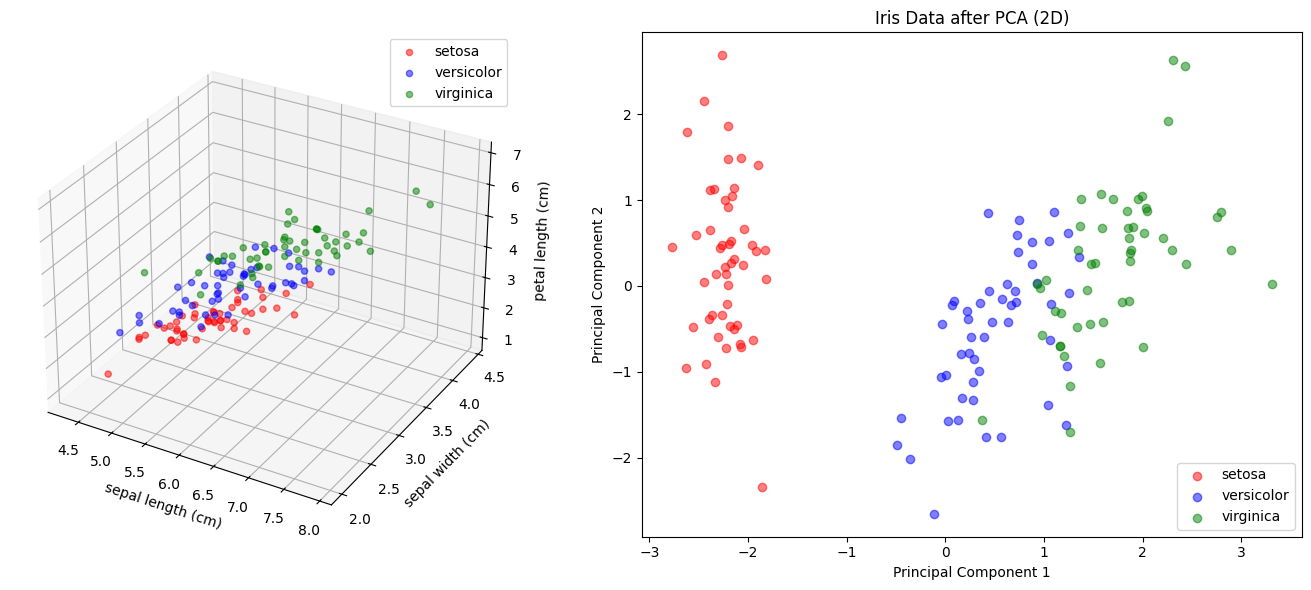

In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()
x_data = iris.data
y_data = iris.target
x_features = iris.feature_names
y_features = iris.target_names

scaler  = StandardScaler()
x_scaled = scaler.fit_transform(x_data)

fig = plt.figure(figsize =(14,6))
ax = fig.add_subplot(121,projection='3d')
for target,color,label in zip(np.unique(y_data),['r','b','g'],y_features):
    ax.scatter(x_data[y_data == target, 0], x_data[y_data==target, 1], x_data[y_data ==target, 2], color=color, label=label, alpha=0.5)
ax.set_xlabel(x_features[0])
ax.set_ylabel(x_features[1])
ax.set_zlabel(x_features[2])
ax.legend()

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

ax1 = fig.add_subplot(122)
for target ,color,label in zip(np.unique(y_data),['r','b','g'],y_features):
    ax1.scatter(x_pca[y_data == target,0],x_pca[y_data==target, 1], color=color, label=label, alpha=0.5)
plt.title('Iris Data after PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.tight_layout()
plt.show()
